<a href="https://colab.research.google.com/github/Willian-Baggio/Disease-Prediction/blob/main/Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Library Import**

In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# **Dataset Importing**

In [222]:
df = pd.read_csv('/content/drive/MyDrive/projetos/Disease_symptom_and_patient_profile_dataset.csv')
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


In [223]:
df.shape

(349, 10)

In [224]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [225]:
df.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [226]:
df.duplicated().sum()

49

In [227]:
df = df.drop_duplicates().reset_index(drop= True)

In [228]:
df.dtypes

Disease                 object
Fever                   object
Cough                   object
Fatigue                 object
Difficulty Breathing    object
Age                      int64
Gender                  object
Blood Pressure          object
Cholesterol Level       object
Outcome Variable        object
dtype: object

# **Data Visualization**


The average age is: 45.75666666666667


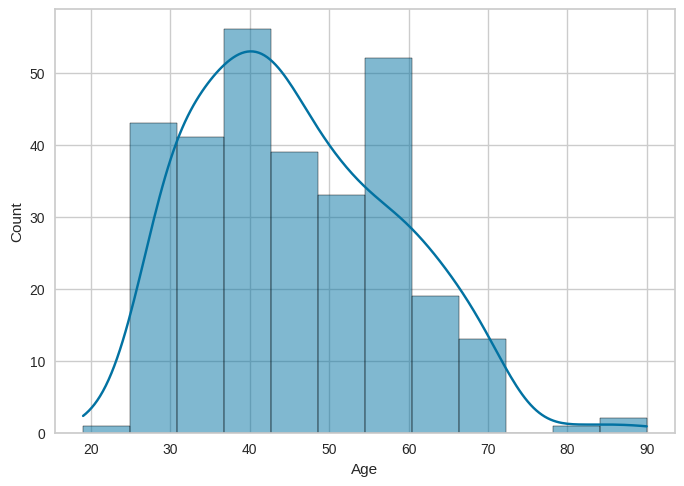

In [337]:
sns.histplot(x = df['Age'], kde = True);

mean_age = df['Age'].mean()
print(f'\nThe average age is: {mean_age}')

In [230]:
fig1 = px.pie(df['Blood Pressure'].value_counts().values, names=df['Blood Pressure'])
fig1.update(layout_title_text='Blood Pressure')
fig1.show()

fig2 = px.pie(df['Cholesterol Level'].value_counts().values, names=df['Cholesterol Level'])
fig2.update(layout_title_text='Cholesterol Level')
fig2.show()

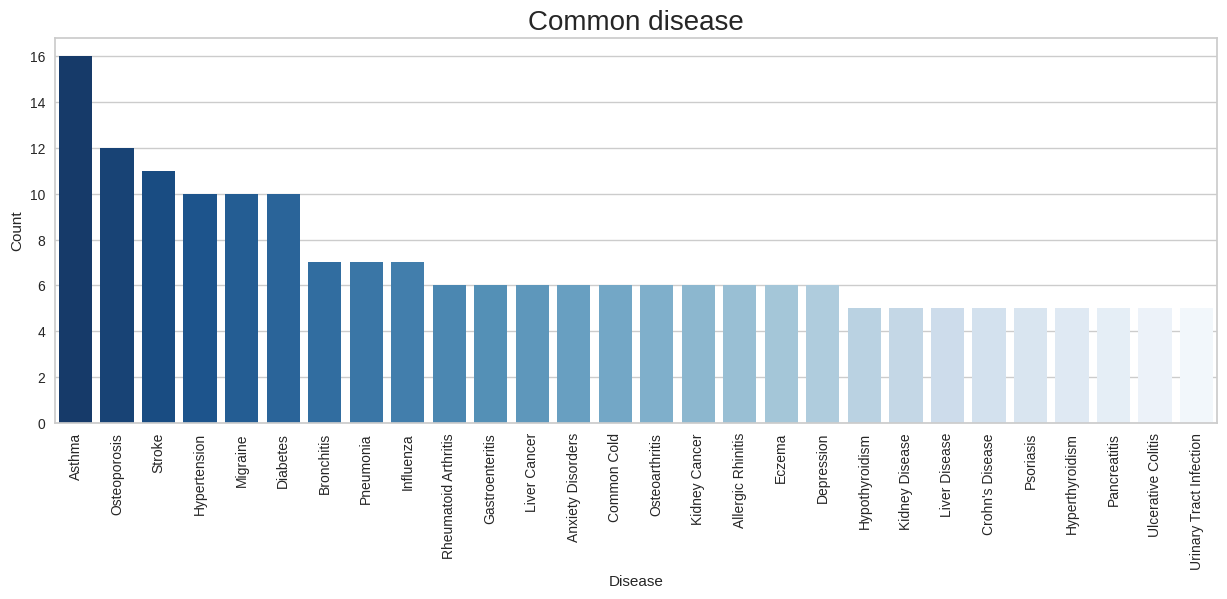

In [335]:
disease_count = pd.DataFrame(df['Disease'].value_counts()).reset_index()

common_disease = disease_count[disease_count['Disease'] > 3]

plt.figure(figsize = (15,5))

sns.barplot(data = common_disease,
           x = 'index',
           y = 'Disease',
           palette = 'Blues_r')
plt.xticks(rotation = 90)
plt.xlabel('Disease')
plt.ylabel('Count')
plt.title('Common disease', fontsize = 20)
plt.show();

In [232]:
df['Disease'].value_counts()

Asthma                            16
Osteoporosis                      12
Stroke                            11
Hypertension                      10
Migraine                          10
                                  ..
Fibromyalgia                       1
Eating Disorders (Anorexia,...     1
Chickenpox                         1
Rabies                             1
Williams Syndrome                  1
Name: Disease, Length: 116, dtype: int64

# **Encoding**

In [233]:
df_encoded = df.copy()

In [234]:
categorical_columns = ['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable']

label_encoder = LabelEncoder()

for col in categorical_columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])
df_encoded

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,56,1,0,1,1,19,0,1,2,1
1,24,0,1,1,0,25,0,2,2,0
2,37,0,1,1,0,25,0,2,2,0
3,6,1,1,0,1,25,1,2,2,1
4,37,1,0,0,0,25,0,2,2,1
...,...,...,...,...,...,...,...,...,...,...
295,106,1,1,1,0,70,0,0,0,1
296,114,0,0,1,0,70,0,2,2,1
297,101,1,0,1,0,80,0,0,0,1
298,101,1,0,1,0,85,1,0,0,1


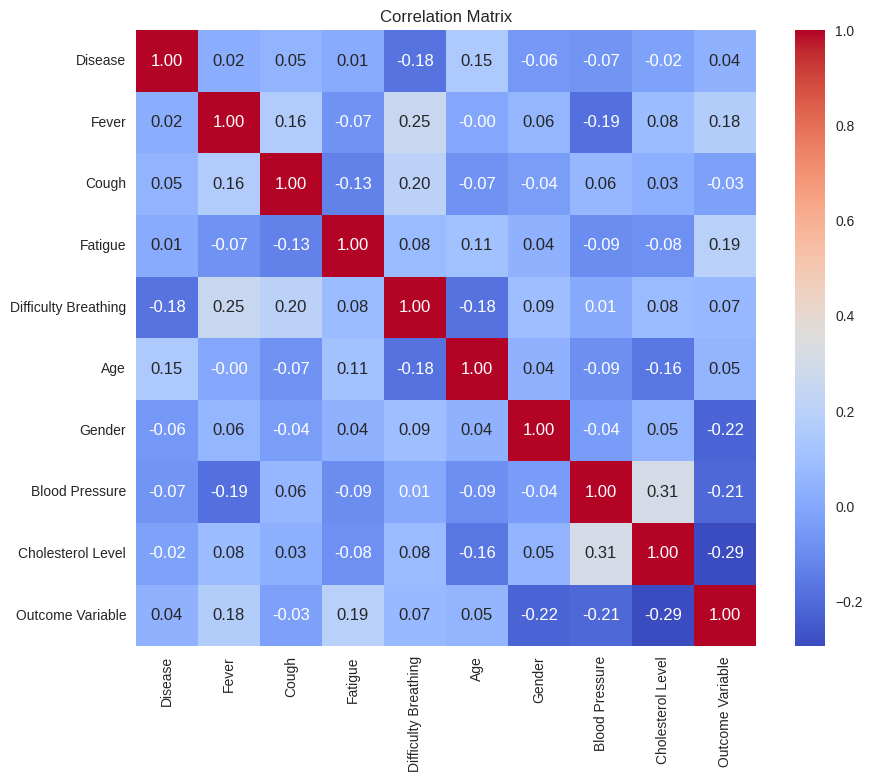

In [338]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [236]:
X = df_encoded.drop(columns=['Outcome Variable'])
y = df_encoded['Outcome Variable']

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [301]:
X_train.shape, y_test.shape

((210, 9), (90,))

In [302]:
X_test.shape, y_train.shape

((90, 9), (210,))

In [303]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Prediction**

## **Decision Tree**

In [342]:
decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(X_train, y_train)

decision_tree_prediction = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, decision_tree_prediction)
print(f'Model Accuracy: {accuracy}')

Model Accuracy: 0.7


In [343]:
print(classification_report(y_test, decision_tree_prediction))

              precision    recall  f1-score   support

           0       0.68      0.62      0.65        40
           1       0.72      0.76      0.74        50

    accuracy                           0.70        90
   macro avg       0.70      0.69      0.69        90
weighted avg       0.70      0.70      0.70        90



## **Random Forest**

In [348]:
random_forest = RandomForestClassifier(n_estimators = 50, criterion = 'entropy')
random_forest.fit(X_train, y_train)

random_forest_prediction = random_forest.predict(X_test)

accuracy_random_forest = accuracy_score(y_test, random_forest_prediction)
print(f'Model Accuracy: {accuracy_random_forest}')

Model Accuracy: 0.7555555555555555


In [349]:
print(classification_report(y_test, random_forest_prediction))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72        40
           1       0.77      0.80      0.78        50

    accuracy                           0.76        90
   macro avg       0.75      0.75      0.75        90
weighted avg       0.75      0.76      0.75        90



## **KNN**

In [350]:
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn.fit(X_train, y_train)

knn_predict = knn.predict(X_test)

knn_accuracy = accuracy_score(y_test, knn_predict)
print(f'Model Accuracy: {accuracy_random_forest}')

Model Accuracy: 0.7555555555555555


In [351]:
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71        40
           1       0.77      0.74      0.76        50

    accuracy                           0.73        90
   macro avg       0.73      0.73      0.73        90
weighted avg       0.74      0.73      0.73        90

